# Introduction

In this project, we are going to use machine learning methods to analyze and classify the churn data. Project has 4 sections.

1- Defining the problem            
2- Data         
3- Evaluation of the model                      
4- Features

## 1-Defining the Problem

Customer churn data received from Kaggle (previously IBM) will be used for classification problem. In this project we will use a machine learning algorithm to predict the customer whether continue using the company service or not. We will apply to forecast the customer choice and then provide the important features according to selected algoritm.

## 2-Data
Data is consisted of 33 different variables and 7043 observation. We will investigate the data, get rid off some variables those are not usefull.

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

### 2.1. Data Preparation

In [3]:
data=pd.read_excel("Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
""" First of all we have to drop Churn Label, Churn Score, CLTV, Churn Reason columns because we are trying to predict the customer's decision
These variables can increase the prediction performance but it will be cheating if we use these so first we will be getting rid of these variables.
""" 

data.drop(["Churn Label", "Churn Score", "CLTV", "Churn Reason"], axis=1, inplace=True)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [5]:
# Next thing we are going to do is figuring out which columns/variables have single value

un_col=[col for col in data.columns if data[col].nunique()==1]
print(un_col)

['Count', 'Country', 'State']


In [6]:
# These columns has a single value so they will not be providing any information

data.drop(un_col, axis=1, inplace=True)
data.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [7]:
""" As far as I can see, Customer Id will not going to provide us any information and also, also Lat Long column is not needed becasue
there are Latitude and Longitude columns (geographic values of customer) has the same value
"""
d_col=["Lat Long", "CustomerID"]
data.drop(d_col, axis=1, inplace=True)
data

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [8]:
data.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [9]:
""" Most of the data's type is object but it is okay because we will change them into numerical data and according to the info about them,
they are categorical data
"""

col_un_val=[data[c].unique for c in data.columns ]
col_un_val

[<bound method Series.unique of 0        Los Angeles
 1        Los Angeles
 2        Los Angeles
 3        Los Angeles
 4        Los Angeles
             ...     
 7038         Landers
 7039        Adelanto
 7040           Amboy
 7041    Angelus Oaks
 7042    Apple Valley
 Name: City, Length: 7043, dtype: object>,
 <bound method Series.unique of 0       90003
 1       90005
 2       90006
 3       90010
 4       90015
         ...  
 7038    92285
 7039    92301
 7040    92304
 7041    92305
 7042    92308
 Name: Zip Code, Length: 7043, dtype: int64>,
 <bound method Series.unique of 0       33.964131
 1       34.059281
 2       34.048013
 3       34.062125
 4       34.039224
           ...    
 7038    34.341737
 7039    34.667815
 7040    34.559882
 7041    34.167800
 7042    34.424926
 Name: Latitude, Length: 7043, dtype: float64>,
 <bound method Series.unique of 0      -118.272783
 1      -118.307420
 2      -118.293953
 3      -118.315709
 4      -118.266293
            ...    
 70

In [10]:
# Let's see how many missing values we have

data.isna().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

In [11]:
""" One interesting thing about the data is Total Charges column is pure number but it is object and also there 
are no missing data in the column so first we will explore it
"""
data["Total Charges"]=pd.to_numeric(data["Total Charges"])
data

ValueError: Unable to parse string " " at position 2234

In [12]:
# According to error, we have blank space on the column, first we have to investigate there are how many blank spaces

len(data.loc[data["Total Charges"]==" "])

11

In [13]:
# We will explore the mentioned rows to decide what are we going to do

data.loc[data["Total Charges"]==" "]

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [14]:
"""The blank valued customers' Tenure Month value is also zero so these are new customers so getting rid of these is an option.
First we will change the values into NaN
"""

data["Total Charges"] = data["Total Charges"].replace([" ", ""], np.nan).astype(object)

In [15]:
data.isna().sum()

City                  0
Zip Code              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
dtype: int64

In [16]:
data.dropna(inplace=True)
data.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [17]:
# We successfully get rid of the NaN values so we can set the Total Charges column as numeric

data["Total Charges"]=pd.to_numeric(data["Total Charges"])
data.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
dtype: object

### 2.2. Splitting The Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=data.drop("Churn Value", axis=1)
y=data["Churn Value"]
X.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

#### Data Encoding

In [21]:
# It is time to change the object to categories because algorithms accept only numerical values.
# Our data is suitable for transforming into categories because of data types so we will encode them.

col=X.select_dtypes(include="object").columns.tolist()
X_enc=pd.get_dummies(X, col)
X_enc.dtypes

Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure Months                                 int64
Monthly Charges                             float64
                                             ...   
Paperless Billing_Yes                          bool
Payment Method_Bank transfer (automatic)       bool
Payment Method_Credit card (automatic)         bool
Payment Method_Electronic check                bool
Payment Method_Mailed check                    bool
Length: 1178, dtype: object

In [22]:
for c in X_enc.columns:
    if X_enc[c].dtype == "bool":
        X_enc[c] = X_enc[c].astype("category")

In [23]:
X_enc.dtypes

Zip Code                                       int64
Latitude                                     float64
Longitude                                    float64
Tenure Months                                  int64
Monthly Charges                              float64
                                              ...   
Paperless Billing_Yes                       category
Payment Method_Bank transfer (automatic)    category
Payment Method_Credit card (automatic)      category
Payment Method_Electronic check             category
Payment Method_Mailed check                 category
Length: 1178, dtype: object

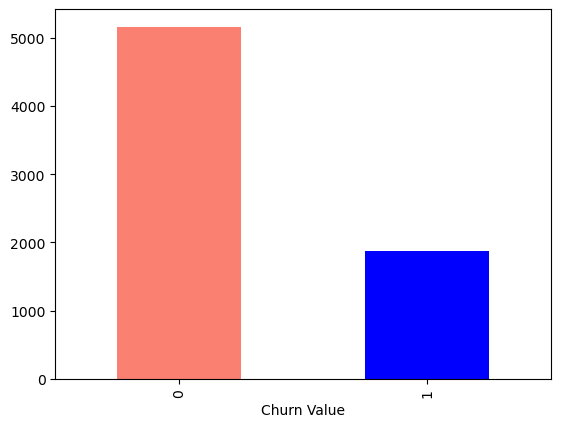

In [24]:
# We have two data, independent variables and dependent (target) variable. Let's see is the target data is balanced or not?
# We are taking the whole data (7032 customer) into consideration to figure out the churn value of the customers

data["Churn Value"].value_counts().plot(kind="bar", color=["salmon", "blue"]);

## 3-Model

In [25]:
# It seems that our target data is not balanced so we have to arrange on train/test split for correct validation

sum(y)/len(y)

0.26578498293515357

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
import catboost as cb

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X_enc, y, random_state=4, test_size=0.2, stratify=y)

In [28]:
# We have adjusted the training and testing data to have the same percentage of 0 and 1

sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.2657777777777778, 0.2658137882018479)

In [29]:
# We need to clarify categorical values for catboost

c_feat = X_train.select_dtypes(include=["category"]).columns.tolist()

# We will prepare o function to present the results

XGB=xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", early_stopping_rounds=10, enable_categorical=True)
CB=cb.CatBoostClassifier(loss_function="Logloss", early_stopping_rounds=10)

models={"XGBoost": XGB, "Catboost": CB}

def fit_and_score(models, X_train, X_test, y_train, y_test, c_feat):
    np.random.seed(4)
    model_scores={}
    for name, model in models.items():
        if name=="XGBoost":
            model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
        else:
            model.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=c_feat)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

model_scores=fit_and_score(models, X_train, X_test, y_train, y_test, c_feat)
print(model_scores);

[0]	validation_0-logloss:0.50015
[1]	validation_0-logloss:0.46123
[2]	validation_0-logloss:0.43748
[3]	validation_0-logloss:0.42397
[4]	validation_0-logloss:0.41470
[5]	validation_0-logloss:0.40847
[6]	validation_0-logloss:0.40548
[7]	validation_0-logloss:0.40267
[8]	validation_0-logloss:0.40180
[9]	validation_0-logloss:0.39875
[10]	validation_0-logloss:0.39859
[11]	validation_0-logloss:0.39709
[12]	validation_0-logloss:0.39950
[13]	validation_0-logloss:0.39915
[14]	validation_0-logloss:0.39995
[15]	validation_0-logloss:0.39990
[16]	validation_0-logloss:0.40128
[17]	validation_0-logloss:0.40184
[18]	validation_0-logloss:0.40215
[19]	validation_0-logloss:0.40244
[20]	validation_0-logloss:0.40287
Learning rate set to 0.04855
0:	learn: 0.6549295	test: 0.6559273	best: 0.6559273 (0)	total: 145ms	remaining: 2m 24s
1:	learn: 0.6196046	test: 0.6210678	best: 0.6210678 (1)	total: 158ms	remaining: 1m 18s
2:	learn: 0.5949930	test: 0.5970164	best: 0.5970164 (2)	total: 169ms	remaining: 56.1s
3:	lear

In [30]:
# For each model confussion matrix are below:

# First XGBoost
np.random.seed(4)
XGB.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_preds=XGB.predict(X_test)
confusion_matrix(y_test, y_preds)

[0]	validation_0-logloss:0.50015
[1]	validation_0-logloss:0.46123
[2]	validation_0-logloss:0.43748
[3]	validation_0-logloss:0.42397
[4]	validation_0-logloss:0.41470
[5]	validation_0-logloss:0.40847
[6]	validation_0-logloss:0.40548
[7]	validation_0-logloss:0.40267
[8]	validation_0-logloss:0.40180
[9]	validation_0-logloss:0.39875
[10]	validation_0-logloss:0.39859
[11]	validation_0-logloss:0.39709
[12]	validation_0-logloss:0.39950
[13]	validation_0-logloss:0.39915
[14]	validation_0-logloss:0.39995
[15]	validation_0-logloss:0.39990
[16]	validation_0-logloss:0.40128
[17]	validation_0-logloss:0.40184
[18]	validation_0-logloss:0.40215
[19]	validation_0-logloss:0.40244
[20]	validation_0-logloss:0.40287
[21]	validation_0-logloss:0.40351


array([[928, 105],
       [168, 206]], dtype=int64)

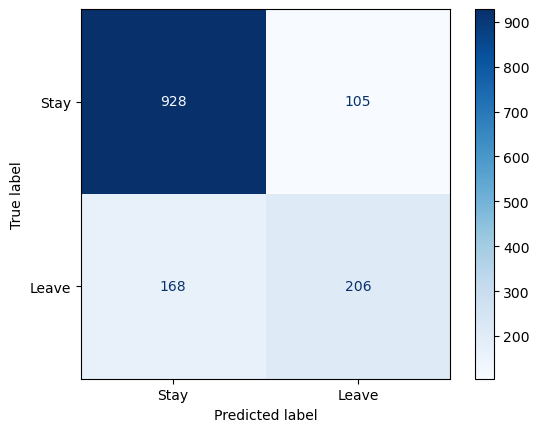

In [31]:
cm = confusion_matrix(y_test, y_preds)
np.random.seed(4)
XGB_CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])
XGB_CM.plot(cmap='Blues')
plt.show()

In [32]:
# Then Catboost

np.random.seed(4)
CB.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=c_feat)
np.random.seed(4)
y_preds=CB.predict(X_test)
confusion_matrix(y_test, y_preds)

Learning rate set to 0.04855
0:	learn: 0.6549295	test: 0.6559273	best: 0.6559273 (0)	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6196046	test: 0.6210678	best: 0.6210678 (1)	total: 24.6ms	remaining: 12.3s
2:	learn: 0.5949930	test: 0.5970164	best: 0.5970164 (2)	total: 35.6ms	remaining: 11.8s
3:	learn: 0.5738723	test: 0.5768160	best: 0.5768160 (3)	total: 47.3ms	remaining: 11.8s
4:	learn: 0.5503940	test: 0.5544177	best: 0.5544177 (4)	total: 58.3ms	remaining: 11.6s
5:	learn: 0.5352113	test: 0.5402099	best: 0.5402099 (5)	total: 69.7ms	remaining: 11.5s
6:	learn: 0.5184779	test: 0.5238150	best: 0.5238150 (6)	total: 80.8ms	remaining: 11.5s
7:	learn: 0.5075240	test: 0.5129926	best: 0.5129926 (7)	total: 91.9ms	remaining: 11.4s
8:	learn: 0.4953884	test: 0.5016845	best: 0.5016845 (8)	total: 103ms	remaining: 11.3s
9:	learn: 0.4851742	test: 0.4923646	best: 0.4923646 (9)	total: 114ms	remaining: 11.3s
10:	learn: 0.4767217	test: 0.4843739	best: 0.4843739 (10)	total: 125ms	remaining: 11.2s
11:	learn: 0.46

array([[934,  99],
       [162, 212]], dtype=int64)

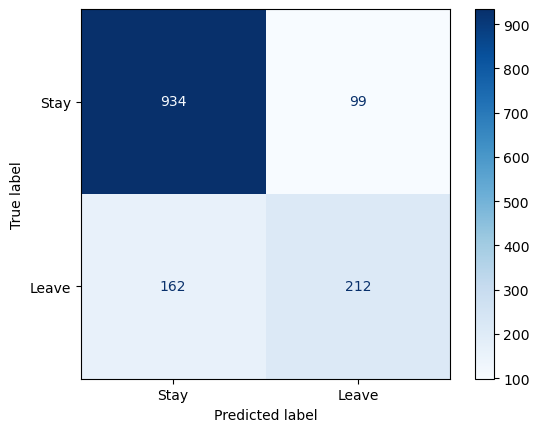

In [33]:
np.random.seed(4)
cm = confusion_matrix(y_test, y_preds)
CB_CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])
CB_CM.plot(cmap='Blues')
plt.show()

### On both analysis Catboost algoritm outperform XGBoost especially on the main objective, to predict unhappy customers and Catboost predicted better 212 to 206 on Leave category so we will proceed with Catboost

### 3.1. Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [35]:
CB_M = cb.CatBoostClassifier(loss_function="Logloss", random_seed=4, subsample=0.9)
np.random.seed(4)
p_grid = {"iterations": [50, 60], "learning_rate": [0.15, 0.2], "depth": [4], "l2_leaf_reg": [1, 1.1],
          "border_count": [1000, 1500, 2000], "random_strength": [0.07, 0.08], "bagging_temperature": [0, 0.2],
          "leaf_estimation_iterations": [1, 2]}


GS_CB = GridSearchCV(estimator=CB_M, param_grid=p_grid, cv=3, verbose=0, n_jobs=-1)

fit_params = {"early_stopping_rounds": 10, "cat_features": c_feat, "eval_set": [(X_test, y_test)]}

GS_CB.fit(X_train, y_train, **fit_params)

print("Best Parameters:", GS_CB.best_params_)
print("Best Score:", GS_CB.best_score_)

C:\Users\bahri\Desktop\Python\Project\env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.5871335	test: 0.5899515	best: 0.5899515 (0)	total: 6.31ms	remaining: 309ms
1:	learn: 0.5248688	test: 0.5285137	best: 0.5285137 (1)	total: 12.3ms	remaining: 294ms
2:	learn: 0.4853382	test: 0.4912496	best: 0.4912496 (2)	total: 18.7ms	remaining: 293ms
3:	learn: 0.4586110	test: 0.4669581	best: 0.4669581 (3)	total: 25.3ms	remaining: 292ms
4:	learn: 0.4395946	test: 0.4476705	best: 0.4476705 (4)	total: 32.2ms	remaining: 290ms
5:	learn: 0.4272866	test: 0.4376996	best: 0.4376996 (5)	total: 38.2ms	remaining: 280ms
6:	learn: 0.4195186	test: 0.4299090	best: 0.4299090 (6)	total: 44.6ms	remaining: 274ms
7:	learn: 0.4118778	test: 0.4230774	best: 0.4230774 (7)	total: 50.4ms	remaining: 265ms
8:	learn: 0.4074806	test: 0.4194171	best: 0.4194171 (8)	total: 56.4ms	remaining: 257ms
9:	learn: 0.4024365	test: 0.4133580	best: 0.4133580 (9)	total: 62.3ms	remaining: 249ms
10:	learn: 0.3991919	test: 0.4119280	best: 0.4119280 (10)	total: 68.4ms	remaining: 242ms
11:	learn: 0.3961846	test: 0.4094021	best

0:	learn: 0.5871335	total: 5.84ms	remaining: 286ms
1:	learn: 0.5248688	total: 12.2ms	remaining: 293ms
2:	learn: 0.4853382	total: 18.2ms	remaining: 285ms
3:	learn: 0.4586110	total: 24.5ms	remaining: 281ms
4:	learn: 0.4395946	total: 30.6ms	remaining: 275ms
5:	learn: 0.4272866	total: 36.6ms	remaining: 268ms
6:	learn: 0.4195186	total: 42.6ms	remaining: 262ms
7:	learn: 0.4118778	total: 49ms	remaining: 257ms
8:	learn: 0.4074806	total: 55.5ms	remaining: 253ms
9:	learn: 0.4024365	total: 61.9ms	remaining: 248ms
10:	learn: 0.3991919	total: 68ms	remaining: 241ms
11:	learn: 0.3961846	total: 73.9ms	remaining: 234ms
12:	learn: 0.3942996	total: 80.3ms	remaining: 228ms
13:	learn: 0.3922023	total: 86ms	remaining: 221ms
14:	learn: 0.3916095	total: 92.2ms	remaining: 215ms
15:	learn: 0.3893628	total: 98ms	remaining: 208ms
16:	learn: 0.3887407	total: 104ms	remaining: 202ms
17:	learn: 0.3877339	total: 110ms	remaining: 195ms
18:	learn: 0.3869657	total: 115ms	remaining: 188ms
19:	learn: 0.3865069	total: 122ms

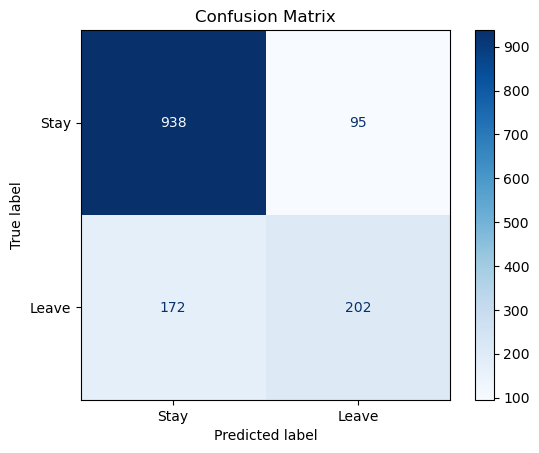

In [36]:
CB_best = GS_CB.best_estimator_

CB_best.fit(X_train, y_train, cat_features=c_feat)

y_preds = CB_best.predict(X_test)

cm = confusion_matrix(y_test, y_preds)

Conf_M_CB = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])
Conf_M_CB.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## I have tried many variations to improve the result using hyperparameter tuning. According to the results, our predictions on Stay/Stay has improved to 938 from 934 but on the contrary predicting the unhappy customers decreased to 202 from 2012 so I will prooceed with base model of Catboost because according to my opinion is forecasting the unhappy (Leave/Leave) customers is more important.

In [37]:
# First we will share the most important features that has importance higher than %3

model = CB

feat_imp = model.get_feature_importance()

feature_names = X_enc.columns

feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": feat_imp}).sort_values(by="Importance", ascending=False)

print(feature_importance[feature_importance.Importance>3])

                              Feature  Importance
1142                   Dependents_Yes   16.580177
1169          Contract_Month-to-month   11.398342
3                       Tenure Months   10.171735
1141                    Dependents_No    8.818213
1149     Internet Service_Fiber optic    5.509586
4                     Monthly Charges    5.456695
5                       Total Charges    5.205968
0                            Zip Code    3.689577
1171                Contract_Two year    3.087368
1176  Payment Method_Electronic check    3.030291


In [38]:
# Let's go into some detail in feature importance

model = CB

feat_imp = pd.Series(model.get_feature_importance(), index=X_enc.columns)

feat_imp.index = feat_imp.index.astype(str)

grouped_importance = feat_imp.groupby(feat_imp.index.str.split("_").str[0]).sum()

sorted_importance = grouped_importance.sort_values(ascending=False)

print("Grouped Feature Importance:\n", sorted_importance)

Grouped Feature Importance:
 Dependents           25.398390
Contract             14.580165
Tenure Months        10.171735
Internet Service      5.984080
Monthly Charges       5.456695
Total Charges         5.205968
Payment Method        4.620701
Tech Support          3.731261
Zip Code              3.689577
Online Security       3.249879
Paperless Billing     2.516277
Multiple Lines        2.373825
Longitude             2.045850
Partner               1.799810
Latitude              1.680734
Streaming TV          1.468416
Streaming Movies      1.409427
Online Backup         1.349616
Senior Citizen        1.263475
Device Protection     0.599158
Phone Service         0.591991
City                  0.514124
Gender                0.298845
dtype: float64


#### I have changed the object type columns to category type so some columns doubled even quadrupled because of the categorization. It is the feature of get_dummies function so for this reason, we grouped the same columns.

#### For example when "Dependents" column has changed into category it is split into two pieces (Yes/No) and in the first presentation of the feature importance, both of them are given separately. In second code we have summoned the same columns to give a different insight to the features.

## Additional Part

I have tried many different variations to improve the performance of the model but couldn'd succeed. This time I will reduce nomber of the independent variables to improve the model performance because sometimes too many features can cause high complexity.

I will only features (independent variables) those have feature importance higher than %4 both total or singular

In [39]:
# We are focussing the grouped importance so we will proceed with every importance over %4 features including the group members that has lower importance 

Red_Col=["Dependents_No", "Dependents_Yes", "Contract_Month-to-month", "Contract_One year", "Contract_Two year", "Tenure Months",
            "Internet Service_Fiber optic","Internet Service_No", "Internet Service_DSL", "Monthly Charges", "Total Charges",
            "Payment Method_Electronic check", "Payment Method_Mailed check", "Payment Method_Credit card (automatic)",
            "Payment Method_Bank transfer (automatic)"]
X_mod=X_enc[Red_Col]
X_mod.head()

,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Tenure Months,Internet Service_Fiber optic,Internet Service_No,Internet Service_DSL,Monthly Charges,Total Charges,Payment Method_Electronic check,Payment Method_Mailed check,Payment Method_Credit card (automatic),Payment Method_Bank transfer (automatic)
0,True,False,True,False,False,2,False,False,True,53.85,108.15,False,True,False,False
1,False,True,True,False,False,2,True,False,False,70.70,151.65,True,False,False,False
2,False,True,True,False,False,8,True,False,False,99.65,820.50,True,False,False,False
3,False,True,True,False,False,28,True,False,False,104.80,3046.05,True,False,False,False
4,False,True,True,False,False,49,True,False,False,103.70,5036.30,False,False,False,True


In [40]:
len(X_mod), len(y)

(7032, 7032)

In [41]:
# With new data, first train-test split

X_train, X_test, y_train, y_test=train_test_split(X_mod, y, random_state=4, test_size=0.2, stratify=y)

In [42]:
c_feat = X_train.select_dtypes(include=["category"]).columns.tolist()

CB_Mod=cb.CatBoostClassifier(loss_function="Logloss", random_seed=4, subsample=0.9, early_stopping_rounds=10)
CB_Mod.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=c_feat)

Learning rate set to 0.04855
0:	learn: 0.6540720	test: 0.6546756	best: 0.6546756 (0)	total: 5.24ms	remaining: 5.23s
1:	learn: 0.6253963	test: 0.6269842	best: 0.6269842 (1)	total: 9.96ms	remaining: 4.97s
2:	learn: 0.6013865	test: 0.6036539	best: 0.6036539 (2)	total: 14.7ms	remaining: 4.87s
3:	learn: 0.5795537	test: 0.5827106	best: 0.5827106 (3)	total: 19.4ms	remaining: 4.83s
4:	learn: 0.5568534	test: 0.5609866	best: 0.5609866 (4)	total: 24.2ms	remaining: 4.82s
5:	learn: 0.5356307	test: 0.5405037	best: 0.5405037 (5)	total: 29.3ms	remaining: 4.85s
6:	learn: 0.5182025	test: 0.5239918	best: 0.5239918 (6)	total: 33.9ms	remaining: 4.81s
7:	learn: 0.5055434	test: 0.5118547	best: 0.5118547 (7)	total: 38.5ms	remaining: 4.77s
8:	learn: 0.4926389	test: 0.4994810	best: 0.4994810 (8)	total: 43ms	remaining: 4.74s
9:	learn: 0.4850064	test: 0.4923327	best: 0.4923327 (9)	total: 47.6ms	remaining: 4.71s
10:	learn: 0.4757167	test: 0.4837057	best: 0.4837057 (10)	total: 52.1ms	remaining: 4.69s
11:	learn: 0.4

In [43]:
CB_Mod.score(X_test, y_test)

0.8038379530916845

Learning rate set to 0.04855
0:	learn: 0.6540720	test: 0.6546756	best: 0.6546756 (0)	total: 5.07ms	remaining: 5.06s
1:	learn: 0.6253963	test: 0.6269842	best: 0.6269842 (1)	total: 9.81ms	remaining: 4.89s
2:	learn: 0.6013865	test: 0.6036539	best: 0.6036539 (2)	total: 14.6ms	remaining: 4.85s
3:	learn: 0.5795537	test: 0.5827106	best: 0.5827106 (3)	total: 19.4ms	remaining: 4.83s
4:	learn: 0.5568534	test: 0.5609866	best: 0.5609866 (4)	total: 24.2ms	remaining: 4.81s
5:	learn: 0.5356307	test: 0.5405037	best: 0.5405037 (5)	total: 28.9ms	remaining: 4.78s
6:	learn: 0.5182025	test: 0.5239918	best: 0.5239918 (6)	total: 33.7ms	remaining: 4.78s
7:	learn: 0.5055434	test: 0.5118547	best: 0.5118547 (7)	total: 38.5ms	remaining: 4.77s
8:	learn: 0.4926389	test: 0.4994810	best: 0.4994810 (8)	total: 43ms	remaining: 4.74s
9:	learn: 0.4850064	test: 0.4923327	best: 0.4923327 (9)	total: 47.7ms	remaining: 4.72s
10:	learn: 0.4757167	test: 0.4837057	best: 0.4837057 (10)	total: 52.5ms	remaining: 4.72s
11:	learn: 0.4

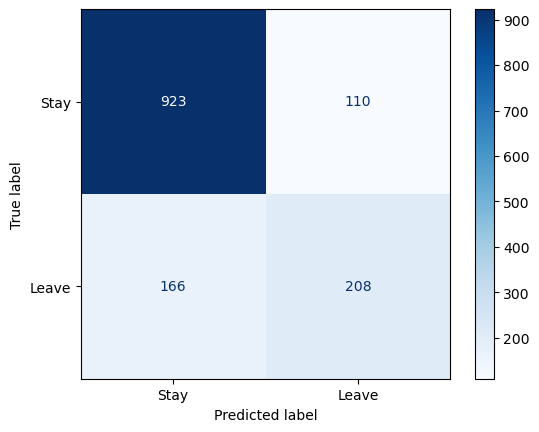

In [44]:
# Score is not promising but I will proceed with confusion matrix

np.random.seed(4)
CB_Mod.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=c_feat)
np.random.seed(4)
y_preds=CB_Mod.predict(X_test)
confusion_matrix(y_test, y_preds)
np.random.seed(4)
cm = confusion_matrix(y_test, y_preds)
CB_New_Matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])
CB_New_Matrix.plot(cmap='Blues')
plt.show()

### Better than hypertuned model but still base model is better so I will tune the parameters whether I succeed to improve the model

In [45]:
CB_Mod_2 = cb.CatBoostClassifier(loss_function="Logloss", random_seed=4, subsample=0.9)
np.random.seed(4)
p_grid = {"iterations": [50, 100, 150], "learning_rate": [0.15, 0.2], "depth": [4], "l2_leaf_reg": [1, 1.1],
          "border_count": [1000, 1500, 2000], "random_strength": [0.07, 0.08], "bagging_temperature": [0, 0.2, 0.5],
          "leaf_estimation_iterations": [1, 2]}


GS_CB_2 = GridSearchCV(estimator=CB_Mod_2, param_grid=p_grid, cv=3, verbose=0, n_jobs=-1)

fit_params = {"early_stopping_rounds": 10, "cat_features": c_feat, "eval_set": [(X_test, y_test)]}

GS_CB_2.fit(X_train, y_train, **fit_params)

print("Best Parameters:", GS_CB_2.best_params_)
print("Best Score:", GS_CB_2.best_score_)

C:\Users\bahri\Desktop\Python\Project\env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.6106446	test: 0.6128679	best: 0.6128679 (0)	total: 3.35ms	remaining: 332ms
1:	learn: 0.5538842	test: 0.5580307	best: 0.5580307 (1)	total: 6.82ms	remaining: 334ms
2:	learn: 0.5140135	test: 0.5188884	best: 0.5188884 (2)	total: 9.82ms	remaining: 318ms
3:	learn: 0.4860570	test: 0.4926663	best: 0.4926663 (3)	total: 12.7ms	remaining: 305ms
4:	learn: 0.4665752	test: 0.4735584	best: 0.4735584 (4)	total: 15.5ms	remaining: 294ms
5:	learn: 0.4503900	test: 0.4578542	best: 0.4578542 (5)	total: 18.8ms	remaining: 295ms
6:	learn: 0.4390048	test: 0.4474444	best: 0.4474444 (6)	total: 21.5ms	remaining: 286ms
7:	learn: 0.4295517	test: 0.4387652	best: 0.4387652 (7)	total: 24.2ms	remaining: 278ms
8:	learn: 0.4231790	test: 0.4331562	best: 0.4331562 (8)	total: 26.8ms	remaining: 271ms
9:	learn: 0.4184200	test: 0.4298765	best: 0.4298765 (9)	total: 29.5ms	remaining: 266ms
10:	learn: 0.4143853	test: 0.4264854	best: 0.4264854 (10)	total: 32.4ms	remaining: 262ms
11:	learn: 0.4111059	test: 0.4238974	best

0:	learn: 0.6106446	total: 2.97ms	remaining: 294ms
1:	learn: 0.5538842	total: 6.39ms	remaining: 313ms
2:	learn: 0.5140135	total: 9.59ms	remaining: 310ms
3:	learn: 0.4860570	total: 12.5ms	remaining: 300ms
4:	learn: 0.4665752	total: 15.2ms	remaining: 288ms
5:	learn: 0.4503900	total: 17.8ms	remaining: 279ms
6:	learn: 0.4390048	total: 20.4ms	remaining: 271ms
7:	learn: 0.4295517	total: 22.9ms	remaining: 264ms
8:	learn: 0.4231790	total: 25.5ms	remaining: 258ms
9:	learn: 0.4184200	total: 28.3ms	remaining: 255ms
10:	learn: 0.4143853	total: 30.9ms	remaining: 250ms
11:	learn: 0.4111059	total: 33.4ms	remaining: 245ms
12:	learn: 0.4076175	total: 36ms	remaining: 241ms
13:	learn: 0.4056262	total: 38.6ms	remaining: 237ms
14:	learn: 0.4034372	total: 41.2ms	remaining: 233ms
15:	learn: 0.4015761	total: 43.8ms	remaining: 230ms
16:	learn: 0.4004148	total: 46.5ms	remaining: 227ms
17:	learn: 0.3993774	total: 49.2ms	remaining: 224ms
18:	learn: 0.3979202	total: 51.7ms	remaining: 220ms
19:	learn: 0.3970665	tot

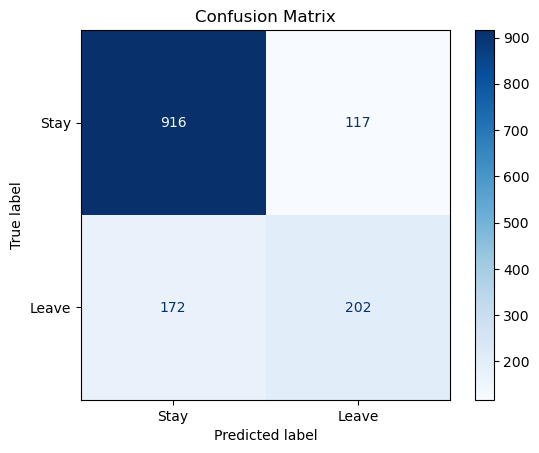

In [46]:
CB_2_ = GS_CB_2.best_estimator_

CB_2_.fit(X_train, y_train, cat_features=c_feat)

y_preds = CB_2_.predict(X_test)

cm = confusion_matrix(y_test, y_preds)

Conf_M_CB_2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])
Conf_M_CB_2.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### Conclusion

My base model outperformed every variation with all independent variables or reduced variables so in this case prooceeding with base model is the best option

In [47]:
import joblib

joblib.dump(CB, 'CB_Class.joblib')

['CB_Class.joblib']